In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets('MNIST_data',one_hot=True)
width=28
height=28
flat=width*height
class_output=10

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [2]:
sess=tf.InteractiveSession()
x  =tf.placeholder(tf.float32,shape=[None,flat])
y_ =tf.placeholder(tf.float32,shape=[None,class_output])

def weight_variable(shape):
    initial=tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)
def bias_variable(shape):
    initial=tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def conv2d(x,W):
    return tf.nn.conv2d(x,W,strides=[1,1,1,1],padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [3]:
W_conv1=weight_variable([5,5,1,32])
b_conv1=bias_variable([32])
x_image=tf.reshape(x,[-1,28,28,1])
convolve1=conv2d(x_image,W_conv1)+b_conv1
h_conv1=tf.nn.relu(convolve1)
h_pool1=max_pool_2x2(h_conv1)
layer1=h_pool1

In [4]:
W_conv2=weight_variable([5,5,32,64])
b_conv2=bias_variable([64])
convolve2=conv2d(layer1,W_conv2)+b_conv2
h_conv2=tf.nn.relu(convolve2)
h_pool2=max_pool_2x2(h_conv2)
layer2=h_pool2

In [5]:
W_fc1=weight_variable([7*7*64, 1024])
b_fc1=bias_variable([1024])
layer2_matrix=tf.reshape(layer2,[-1,7*7*64])
matmul_fc1=tf.matmul(layer2_matrix, W_fc1) + b_fc1
h_fc1 = tf.nn.relu(matmul_fc1)
layer3=h_fc1

In [6]:
keep_prob=tf.placeholder(tf.float32)
layer3_drop=tf.nn.dropout(layer3,keep_prob)

In [7]:
W_fc2=weight_variable([1024,10])
b_fc2=bias_variable([10])
matmul_fc2=tf.matmul(layer3_drop,W_fc2)+b_fc2

In [8]:
y_conv=tf.nn.softmax(matmul_fc2)
layer4=y_conv

In [9]:
cross_entropy=tf.reduce_mean(-tf.reduce_sum(y_*tf.log(layer4), reduction_indices=[1]))
train_step=tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

correct_prediction=tf.equal(tf.argmax(layer4,1),tf.arg_max(y_,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

sess.run(tf.initialize_all_variables())

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [10]:
for i in range(1100):
    batch=mnist.train.next_batch(100)
    if i%100==0:
        train_accuracy=accuracy.eval(feed_dict={x:batch[0], y_:batch[1], keep_prob:1.0})
        print("step: {}, accuracy: {}".format(i,float(train_accuracy)))
    #train_step.run(feed_dict={x:batch[0], y_:batch[1], keep_prob:0.5})
    h_train_step,h_W_conv1,h_b_conv1=sess.run([train_step,W_conv1,b_conv1],feed_dict={x:batch[0], y_:batch[1], keep_prob:0.5})

step: 0, accuracy: 0.10000000149011612
step: 100, accuracy: 0.8799999952316284
step: 200, accuracy: 0.9100000262260437
step: 300, accuracy: 0.9399999976158142
step: 400, accuracy: 0.949999988079071
step: 500, accuracy: 0.9399999976158142
step: 600, accuracy: 0.9700000286102295
step: 700, accuracy: 0.9700000286102295
step: 800, accuracy: 0.9700000286102295
step: 900, accuracy: 0.9800000190734863
step: 1000, accuracy: 0.9800000190734863


In [11]:
accuracy.eval(feed_dict={x:mnist.test.images, y_:mnist.test.labels, keep_prob:1.0})

0.9734

In [12]:
sess.close()

In [13]:
%matplotlib inline
from matplotlib import pyplot as plt

In [14]:
h_W_conv1

array([[[[-0.16184948, -0.08837895, -0.08877357,  0.02614399,  0.01632454,
          -0.10215862,  0.10784236,  0.02263418,  0.00261961,  0.08226734,
          -0.15121275,  0.16250069,  0.0721689 , -0.10790522,  0.04760463,
           0.03279794,  0.12568279,  0.09780038,  0.03611439,  0.15748386,
           0.03928082, -0.05184732,  0.00182927,  0.03326987, -0.00408547,
          -0.03173674,  0.04672935, -0.06676449, -0.00472565, -0.00031183,
           0.14467099, -0.05688465]],

        [[-0.09558082, -0.00256516, -0.02277516,  0.18278697,  0.0099069 ,
          -0.03128622,  0.02026596,  0.11949767, -0.08751547, -0.03529371,
           0.00490678, -0.04859135, -0.11233988, -0.07796423, -0.11436452,
           0.10311532,  0.13007626, -0.01308222, -0.03680307, -0.02149904,
           0.11212873,  0.06485919,  0.0558784 ,  0.06396871, -0.00272436,
          -0.10534572,  0.08500883, -0.06765714,  0.13904011, -0.03246991,
          -0.06172682, -0.01113218]],

        [[-0.11572938,

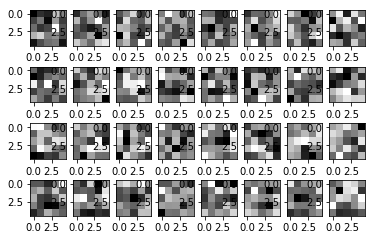

In [15]:
for i in range(1,4*8+1):
        plt.subplot(4, 8, i)
        #plt.xlabel()
        #plt.ylabel()
        plt.imshow(h_W_conv1[:,:,0,i-1]+h_b_conv1[i-1],cmap="gray")

In [16]:
i

32